# Title : Predicting the Habitability of Exoplanets Using Machine Learning 

importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

loading the dataset

In [2]:
df=pd.read_csv(r'C:\Users\chari\Downloads\hwc.csv')
df

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,2020-04-02,250.00000,-120.00000,413.00000,0,Mass,...,NaN,0.214133,0,0,NaN,0,NaN,Scorpius,Sco,Scorpion
1,Kepler-276 c,Transit,Kepler,2013,2018-09-25,16.60000,-3.60000,4.40000,0,Mass,...,2.097783,0.316980,0,0,Hot,0,0.272032,Cygnus,Cyg,Swan
2,Kepler-829 b,Transit,Kepler,2016,2019-04-16,5.10000,NaN,NaN,0,M-R relationship,...,1.756317,0.459559,0,0,Hot,0,0.254763,Lyra,Lyr,Lyre
3,K2-283 b,Transit,K2,2018,2019-09-05,12.20000,NaN,NaN,0,M-R relationship,...,0.568374,0.443760,0,0,Hot,0,0.193906,Pisces,Psc,Fishes
4,Kepler-477 b,Transit,Kepler,2016,2019-04-16,4.94000,NaN,NaN,0,M-R relationship,...,0.768502,0.386150,0,0,Hot,0,0.276721,Lyra,Lyr,Lyre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,HD 222155 b,Radial Velocity,Haute-Provence Observatory,2011,2023-06-12,581.62598,-82.63539,111.23994,0,Mass,...,1.893917,0.541322,0,0,Cold,0,0.178593,Andromeda,And,Andromeda
5595,HD 88986 b,Radial Velocity,Haute-Provence Observatory,2023,2023-12-04,17.20000,-3.80000,4.00000,0,Mass,...,2.520276,0.543834,0,0,Hot,0,0.379540,Leo Minor,LMi,Little Lion
5596,Kepler-30 b,Transit,Kepler,2012,2023-11-28,11.30000,-1.40000,1.40000,0,Mass,...,1.249824,0.400198,0,0,Hot,0,0.241771,Lyra,Lyr,Lyre
5597,HD 3167 d,Radial Velocity,Multiple Observatories,2017,2023-04-17,4.33000,-0.45000,0.45000,0,Msini,...,0.787469,0.475336,0,0,Hot,0,0.272975,Pisces,Psc,Fishes


displaying first 5 rows

In [3]:
print("Sample Data:")
display(df.head())

Sample Data:


,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,2020-04-02,250.00,-120.0,413.0,0,Mass,...,NaN,0.214133,0,0,NaN,0,NaN,Scorpius,Sco,Scorpion
1,Kepler-276 c,Transit,Kepler,2013,2018-09-25,16.60,-3.6,4.4,0,Mass,...,2.097783,0.316980,0,0,Hot,0,0.272032,Cygnus,Cyg,Swan
2,Kepler-829 b,Transit,Kepler,2016,2019-04-16,5.10,NaN,NaN,0,M-R relationship,...,1.756317,0.459559,0,0,Hot,0,0.254763,Lyra,Lyr,Lyre
3,K2-283 b,Transit,K2,2018,2019-09-05,12.20,NaN,NaN,0,M-R relationship,...,0.568374,0.443760,0,0,Hot,0,0.193906,Pisces,Psc,Fishes
4,Kepler-477 b,Transit,Kepler,2016,2019-04-16,4.94,NaN,NaN,0,M-R relationship,...,0.768502,0.386150,0,0,Hot,0,0.276721,Lyra,Lyr,Lyre


checking number of rows and columns

In [4]:
print("Rows and Columns:", df.shape)

Rows and Columns: (5599, 118)


In [5]:
df.size

660682

Printing column names

In [6]:
df.columns

Index(['P_NAME', 'P_DETECTION', 'P_DISCOVERY_FACILITY', 'P_YEAR', 'P_UPDATE',
       'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX', 'P_MASS_LIMIT',
       'P_MASS_ORIGIN',
       ...
       'S_ABIO_ZONE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_HABZONE_CON',
       'P_TYPE_TEMP', 'P_HABITABLE', 'P_ESI', 'S_CONSTELLATION',
       'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'],
      dtype='object', length=118)

Identifying null values

In [7]:
df.isnull()

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5596,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


finding out how many null values are there in each column

In [8]:
df.isnull().sum()

P_NAME                    0
P_DETECTION               0
P_DISCOVERY_FACILITY      0
P_YEAR                    0
P_UPDATE                  0
                       ... 
P_HABITABLE               0
P_ESI                   241
S_CONSTELLATION           0
S_CONSTELLATION_ABR       0
S_CONSTELLATION_ENG       0
Length: 118, dtype: int64

handling missing values

In [9]:
 # filling nmerical columns
df = df.fillna(df.mean()) 

c:\users\chari\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [10]:
df

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,2020-04-02,250.00000,-120.00000,413.000000,0,Mass,...,1.014471e+35,0.214133,0,0,NaN,0,0.257089,Scorpius,Sco,Scorpion
1,Kepler-276 c,Transit,Kepler,2013,2018-09-25,16.60000,-3.60000,4.400000,0,Mass,...,2.097783e+00,0.316980,0,0,Hot,0,0.272032,Cygnus,Cyg,Swan
2,Kepler-829 b,Transit,Kepler,2016,2019-04-16,5.10000,-127.77752,174.465166,0,M-R relationship,...,1.756317e+00,0.459559,0,0,Hot,0,0.254763,Lyra,Lyr,Lyre
3,K2-283 b,Transit,K2,2018,2019-09-05,12.20000,-127.77752,174.465166,0,M-R relationship,...,5.683741e-01,0.443760,0,0,Hot,0,0.193906,Pisces,Psc,Fishes
4,Kepler-477 b,Transit,Kepler,2016,2019-04-16,4.94000,-127.77752,174.465166,0,M-R relationship,...,7.685024e-01,0.386150,0,0,Hot,0,0.276721,Lyra,Lyr,Lyre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,HD 222155 b,Radial Velocity,Haute-Provence Observatory,2011,2023-06-12,581.62598,-82.63539,111.239940,0,Mass,...,1.893917e+00,0.541322,0,0,Cold,0,0.178593,Andromeda,And,Andromeda
5595,HD 88986 b,Radial Velocity,Haute-Provence Observatory,2023,2023-12-04,17.20000,-3.80000,4.000000,0,Mass,...,2.520276e+00,0.543834,0,0,Hot,0,0.379540,Leo Minor,LMi,Little Lion
5596,Kepler-30 b,Transit,Kepler,2012,2023-11-28,11.30000,-1.40000,1.400000,0,Mass,...,1.249824e+00,0.400198,0,0,Hot,0,0.241771,Lyra,Lyr,Lyre
5597,HD 3167 d,Radial Velocity,Multiple Observatories,2017,2023-04-17,4.33000,-0.45000,0.450000,0,Msini,...,7.874695e-01,0.475336,0,0,Hot,0,0.272975,Pisces,Psc,Fishes


In [11]:
# filling categorical values
df = df.fillna(df.select_dtypes(include='object').mode().iloc[0])


In [12]:
df

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,2020-04-02,250.00000,-120.00000,413.000000,0,Mass,...,1.014471e+35,0.214133,0,0,Hot,0,0.257089,Scorpius,Sco,Scorpion
1,Kepler-276 c,Transit,Kepler,2013,2018-09-25,16.60000,-3.60000,4.400000,0,Mass,...,2.097783e+00,0.316980,0,0,Hot,0,0.272032,Cygnus,Cyg,Swan
2,Kepler-829 b,Transit,Kepler,2016,2019-04-16,5.10000,-127.77752,174.465166,0,M-R relationship,...,1.756317e+00,0.459559,0,0,Hot,0,0.254763,Lyra,Lyr,Lyre
3,K2-283 b,Transit,K2,2018,2019-09-05,12.20000,-127.77752,174.465166,0,M-R relationship,...,5.683741e-01,0.443760,0,0,Hot,0,0.193906,Pisces,Psc,Fishes
4,Kepler-477 b,Transit,Kepler,2016,2019-04-16,4.94000,-127.77752,174.465166,0,M-R relationship,...,7.685024e-01,0.386150,0,0,Hot,0,0.276721,Lyra,Lyr,Lyre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,HD 222155 b,Radial Velocity,Haute-Provence Observatory,2011,2023-06-12,581.62598,-82.63539,111.239940,0,Mass,...,1.893917e+00,0.541322,0,0,Cold,0,0.178593,Andromeda,And,Andromeda
5595,HD 88986 b,Radial Velocity,Haute-Provence Observatory,2023,2023-12-04,17.20000,-3.80000,4.000000,0,Mass,...,2.520276e+00,0.543834,0,0,Hot,0,0.379540,Leo Minor,LMi,Little Lion
5596,Kepler-30 b,Transit,Kepler,2012,2023-11-28,11.30000,-1.40000,1.400000,0,Mass,...,1.249824e+00,0.400198,0,0,Hot,0,0.241771,Lyra,Lyr,Lyre
5597,HD 3167 d,Radial Velocity,Multiple Observatories,2017,2023-04-17,4.33000,-0.45000,0.450000,0,Msini,...,7.874695e-01,0.475336,0,0,Hot,0,0.272975,Pisces,Psc,Fishes


handling outliers

In [13]:
df[df.select_dtypes(include=['int64','float64']).columns] = df.select_dtypes(include=['int64','float64']).apply(
    lambda x: x.clip(x.quantile(0.01), x.quantile(0.99))
)


In [14]:
df

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020.0,2020-04-02,250.00000,-120.00000,413.000000,0.0,Mass,...,1.014471e+35,0.214133,0,0,Hot,0.0,0.257089,Scorpius,Sco,Scorpion
1,Kepler-276 c,Transit,Kepler,2013.0,2018-09-25,16.60000,-3.60000,4.400000,0.0,Mass,...,2.097783e+00,0.316980,0,0,Hot,0.0,0.272032,Cygnus,Cyg,Swan
2,Kepler-829 b,Transit,Kepler,2016.0,2019-04-16,5.10000,-127.77752,174.465166,0.0,M-R relationship,...,1.756317e+00,0.459559,0,0,Hot,0.0,0.254763,Lyra,Lyr,Lyre
3,K2-283 b,Transit,K2,2018.0,2019-09-05,12.20000,-127.77752,174.465166,0.0,M-R relationship,...,5.683741e-01,0.443760,0,0,Hot,0.0,0.193906,Pisces,Psc,Fishes
4,Kepler-477 b,Transit,Kepler,2016.0,2019-04-16,4.94000,-127.77752,174.465166,0.0,M-R relationship,...,7.685024e-01,0.386150,0,0,Hot,0.0,0.276721,Lyra,Lyr,Lyre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,HD 222155 b,Radial Velocity,Haute-Provence Observatory,2011.0,2023-06-12,581.62598,-82.63539,111.239940,0.0,Mass,...,1.893917e+00,0.541322,0,0,Cold,0.0,0.178593,Andromeda,And,Andromeda
5595,HD 88986 b,Radial Velocity,Haute-Provence Observatory,2023.0,2023-12-04,17.20000,-3.80000,4.000000,0.0,Mass,...,2.520276e+00,0.543834,0,0,Hot,0.0,0.379540,Leo Minor,LMi,Little Lion
5596,Kepler-30 b,Transit,Kepler,2012.0,2023-11-28,11.30000,-1.40000,1.400000,0.0,Mass,...,1.249824e+00,0.400198,0,0,Hot,0.0,0.241771,Lyra,Lyr,Lyre
5597,HD 3167 d,Radial Velocity,Multiple Observatories,2017.0,2023-04-17,4.33000,-0.45000,0.450000,0.0,Msini,...,7.874695e-01,0.475336,0,0,Hot,0.0,0.272975,Pisces,Psc,Fishes


In [15]:
# fixing inconsistant values in the dataset


df['star_type'] = df['S_TYPE_TEMP'].astype(str).str.lower().str.strip()

# Applying the replacement logic 
df['star_type'] = df['star_type'].replace({
    'g-type': 'g',
    'g type': 'g',
    'k-type': 'k',
    'k type': 'k',
    'm-type': 'm',
    'm type': 'm'
})


one-hot encoding

In [16]:
encoded = pd.get_dummies(df['star_type'], prefix='star')
df = pd.concat([df, encoded], axis=1)

feature engineering

In [17]:
# Habitability_Index
df['Habitability_Index'] = (df['P_RADIUS'] + df['P_MASS'] + df['P_TEMP_SURF']) / 3

# Stellar_Compatibility
df['Stellar_Compatibility'] = (df['S_TEMPERATURE'] + df['S_METALLICITY']) / 2

Normalization using Min-Max scaling

In [18]:
#  planet mass normalization:
df['planet_mass_norm'] = (df['P_MASS'] - df['P_MASS'].min()) / (df['P_MASS'].max() - df['P_MASS'].min())

#  planet radius normalization:
df['planet_radius_norm'] = (df['P_RADIUS'] - df['P_RADIUS'].min()) / (df['P_RADIUS'].max() - df['P_RADIUS'].min())

#  surface temperature normalization:
df['surface_temperature_norm'] = (df['P_TEMP_SURF'] - df['P_TEMP_SURF'].min()) / (df['P_TEMP_SURF'].max() - df['P_TEMP_SURF'].min())

Descriptive Statistics

In [19]:
df.describe()

,P_YEAR,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_RADIUS_LIMIT,P_PERIOD,...,star_k,star_m,star_o,star_psr,star_wd,Habitability_Index,Stellar_Compatibility,planet_mass_norm,planet_radius_norm,surface_temperature_norm
count,5599.000000,5599.000000,5599.000000,5599.000000,5599.000000,5599.000000,5599.000000,5599.000000,5599.0,5599.000000,...,5599.000000,5599.000000,5599.000000,5599.00000,5599.000000,5599.000000,5599.000000,5599.000000,5599.000000,5599.000000
mean,2016.207358,359.553519,-117.425094,155.308509,0.024647,5.675637,-0.403789,0.495217,0.0,4097.900482,...,0.263440,0.098410,0.000179,0.00125,0.000536,444.606039,2677.936745,0.057012,0.282139,0.370136
std,4.434918,999.177429,150.445335,195.191366,0.155061,5.148637,0.375658,0.449944,0.0,16843.082065,...,0.440538,0.297895,0.013364,0.03534,0.023143,347.596596,398.488215,0.158610,0.295511,0.156728
min,2001.000000,0.399000,-1111.153526,0.230000,0.000000,0.759980,-2.355520,0.030000,0.0,0.672415,...,0.000000,0.000000,0.000000,0.00000,0.000000,98.018725,1578.310000,0.000000,0.000000,0.000000
25%,2014.000000,4.040000,-127.777520,25.902615,0.000000,1.780000,-0.432279,0.190000,0.0,4.638710,...,0.000000,0.000000,0.000000,0.00000,0.000000,326.604674,2485.287500,0.000578,0.058545,0.372001
50%,2016.000000,8.750000,-127.777520,174.465166,0.000000,2.781000,-0.432279,0.544259,0.0,12.737200,...,0.000000,0.000000,0.000000,0.00000,0.000000,338.718933,2762.545000,0.001326,0.115998,0.372001
75%,2020.000000,162.728960,-25.426400,174.465166,0.000000,11.891500,-0.157000,0.544259,0.0,56.425447,...,1.000000,0.000000,0.000000,0.00000,0.000000,455.269174,2943.580000,0.025768,0.638905,0.372001
max,2023.000000,6299.994728,-0.230000,1430.200000,1.000000,18.182800,-0.030000,2.910600,0.0,79940.819612,...,1.000000,1.000000,1.000000,1.00000,1.000000,2430.057184,3602.435000,1.000000,1.000000,1.000000


histogram plot

Text(0.5, 1.0, "Distribution of Planet Mass ('P_MASS')")

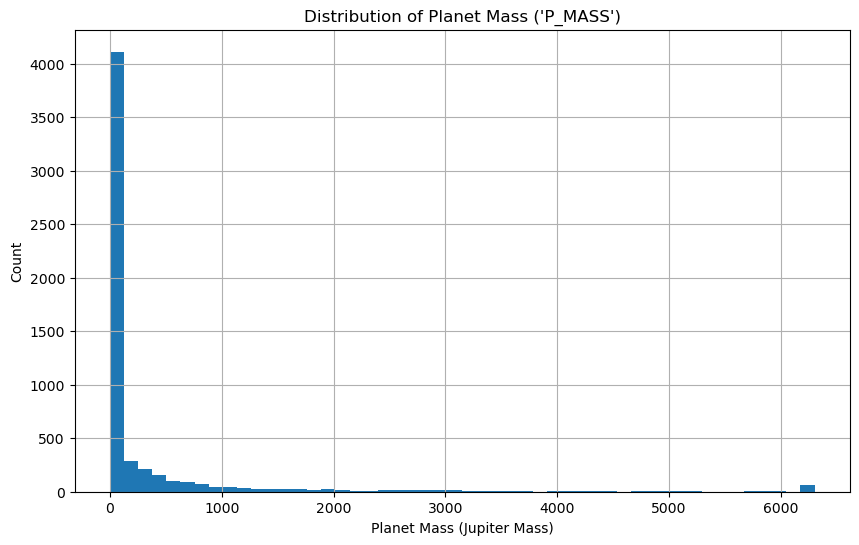

In [20]:

plt.figure(figsize=(10, 6))
df['P_MASS'].hist(bins=50)
plt.xlabel("Planet Mass (Jupiter Mass)")
plt.ylabel("Count")
plt.title("Distribution of Planet Mass ('P_MASS')")

([<matplotlib.axis.XTick at 0x2b6ab56f608>], [Text(0, 0, 'P_MASS')])

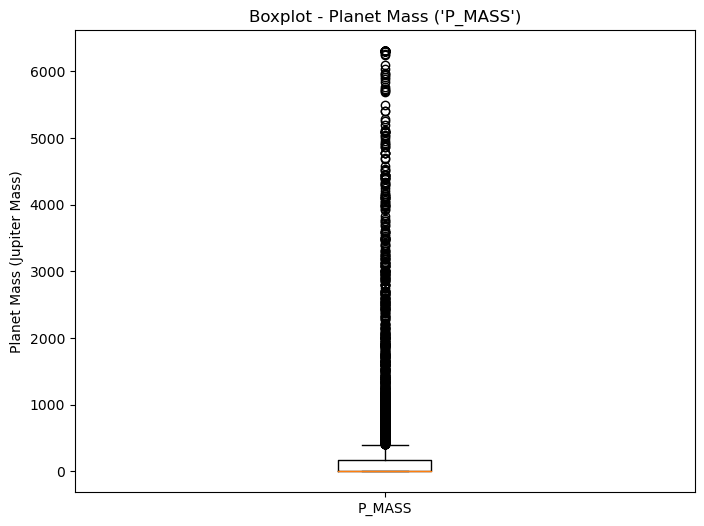

In [21]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['P_MASS'].dropna()) # .dropna() handles missing values
plt.title("Boxplot - Planet Mass ('P_MASS')")
plt.ylabel("Planet Mass (Jupiter Mass)")
plt.xticks([1], ['P_MASS'])

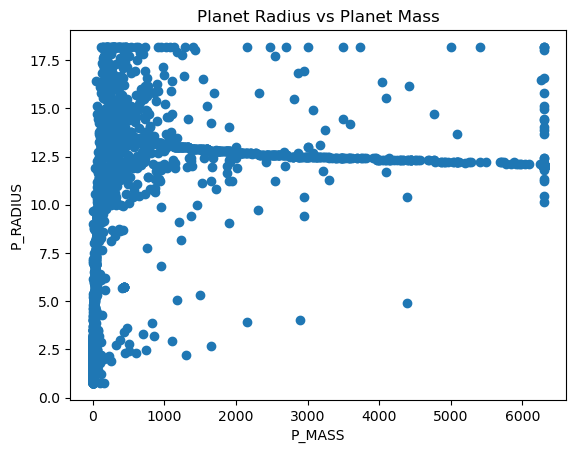

In [22]:
# Filter valid rows
data = df[(df['P_MASS'] > 0) & (df['P_RADIUS'] > 0)]

# Scatter plot
plt.scatter(data['P_MASS'], data['P_RADIUS'])
plt.xlabel("P_MASS")
plt.ylabel("P_RADIUS")
plt.title("Planet Radius vs Planet Mass")
plt.show()


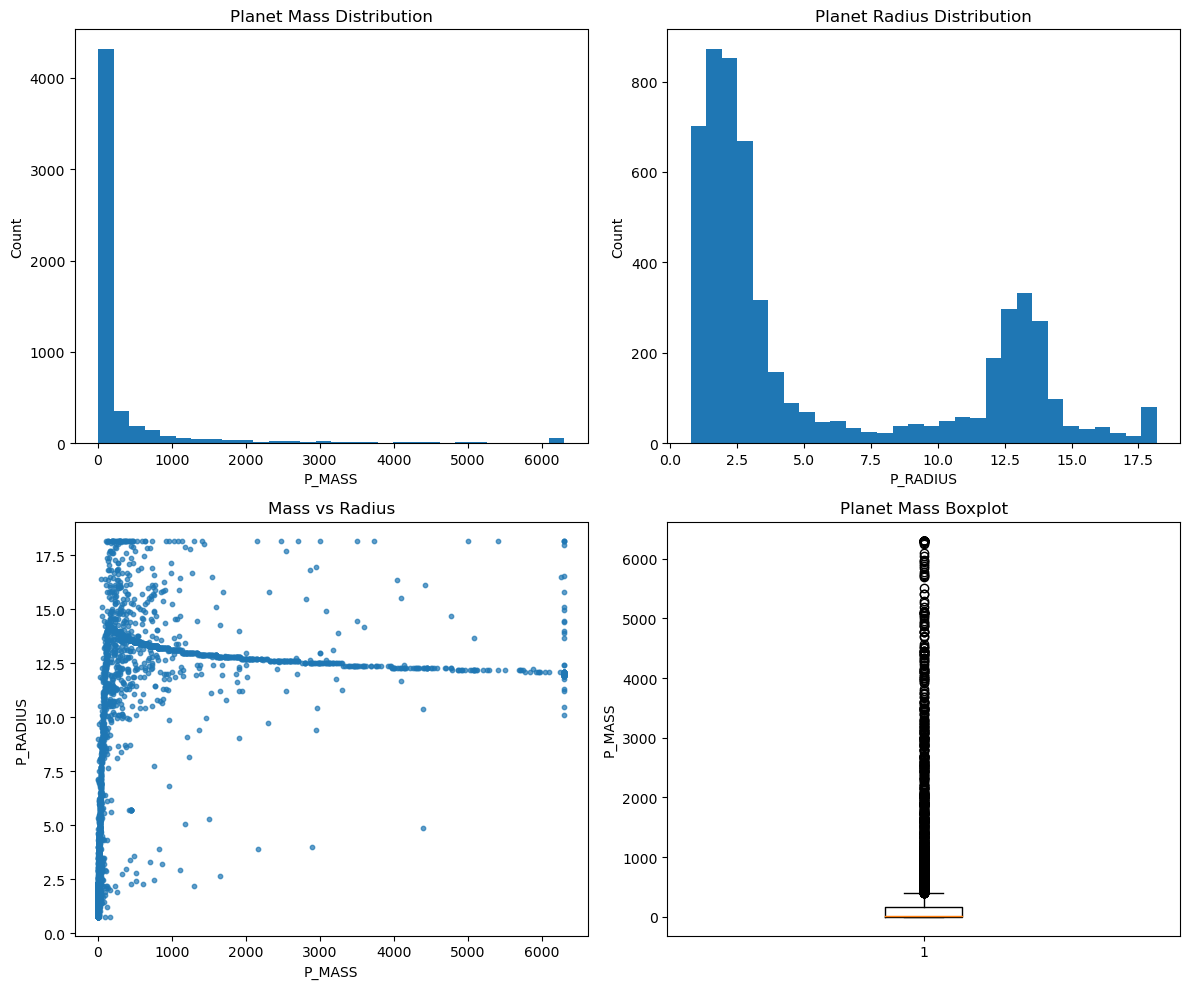

In [23]:
import matplotlib.pyplot as plt

# Filter valid data for safer plotting
data = df[(df['P_MASS'] > 0) & (df['P_RADIUS'] > 0)]

plt.figure(figsize=(12, 10))

# -------------------- Plot 1: Planet Mass Histogram --------------------
plt.subplot(2, 2, 1)
plt.hist(df['P_MASS'].dropna(), bins=30)
plt.title("Planet Mass Distribution")
plt.xlabel("P_MASS")
plt.ylabel("Count")

# -------------------- Plot 2: Planet Radius Histogram --------------------
plt.subplot(2, 2, 2)
plt.hist(df['P_RADIUS'].dropna(), bins=30)
plt.title("Planet Radius Distribution")
plt.xlabel("P_RADIUS")
plt.ylabel("Count")

# -------------------- Plot 3: Mass vs Radius Scatter --------------------
plt.subplot(2, 2, 3)
plt.scatter(data['P_MASS'], data['P_RADIUS'], s=10, alpha=0.7)
plt.title("Mass vs Radius")
plt.xlabel("P_MASS")
plt.ylabel("P_RADIUS")

# -------------------- Plot 4: Boxplot for Planet Mass --------------------
plt.subplot(2, 2, 4)
plt.boxplot(df['P_MASS'].dropna())
plt.title("Planet Mass Boxplot")
plt.ylabel("P_MASS")

plt.tight_layout()
plt.show()


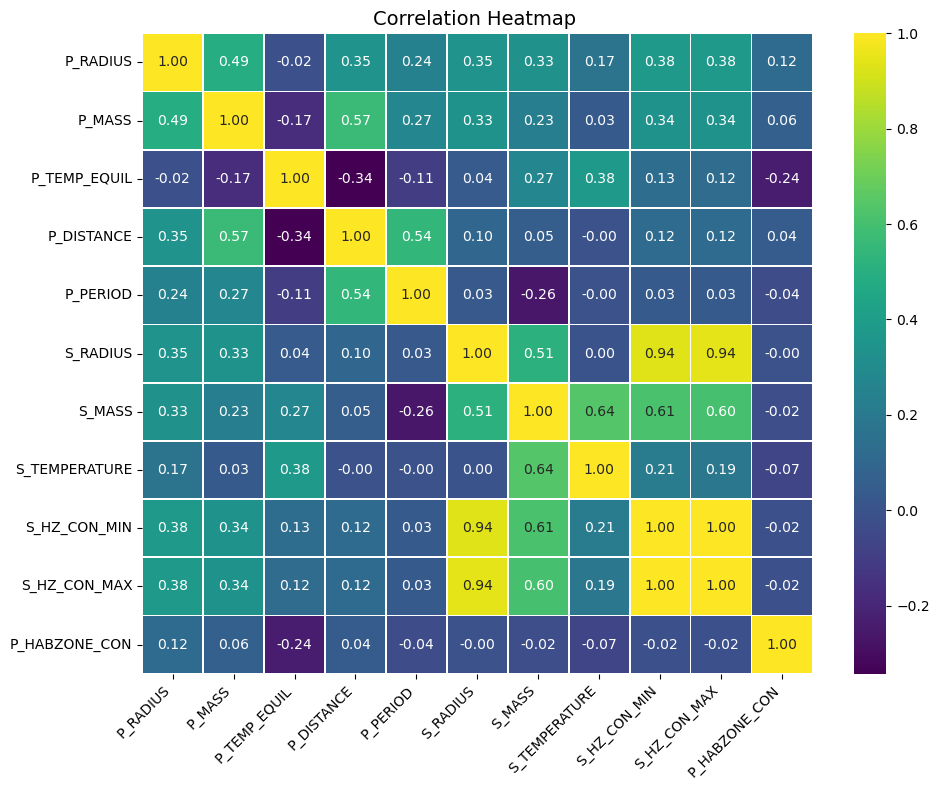

In [28]:

habitability_cols = [
    'P_RADIUS',
    'P_MASS',
    'P_TEMP_EQUIL',  
    'P_DISTANCE',
    'P_PERIOD',
    'S_RADIUS',
    'S_MASS',
    'S_TEMPERATURE', 
    'S_HZ_CON_MIN',  
    'S_HZ_CON_MAX', 
    'P_HABZONE_CON'  
]

# Correlation matrix
correlation = df[habitability_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation,
    annot=True,
    fmt=".2f",
    cmap='viridis',
    cbar=True,
    linewidths=.5,
    linecolor='white'
)

plt.title("Correlation Heatmap ", fontsize=14)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('habitability_correlation_heatmap_fixed.png')

In [28]:
corr = df.corr().abs()

top_corr = (corr.unstack()
                .sort_values(ascending=False)
                .drop_duplicates()[1:11])

print("Top 10 strongest correlations:\n")
print(top_corr)


Top 10 strongest correlations:

P_YEAR                 P_YEAR                1.0
P_RADIUS               planet_radius_norm    1.0
planet_mass_norm       P_MASS                1.0
P_TEMP_EQUIL_MIN       P_TEMP_SURF_MIN       1.0
P_TEMP_SURF_MAX        P_TEMP_EQUIL_MAX      1.0
S_HZ_CON1_MAX          S_HZ_OPT_MAX          1.0
S_HZ_OPT_MIN           S_HZ_CON_MIN          1.0
S_HZ_CON1_MIN          S_HZ_CON_MIN          1.0
S_HZ_OPT_MIN           S_HZ_CON1_MIN         1.0
Stellar_Compatibility  S_TEMPERATURE         1.0
dtype: float64
